<a href="https://colab.research.google.com/github/Fikazlf/Data_Analyst-Gaming_Sales_Insight/blob/main/GameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Library**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

### **Read Data**

In [39]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/export?format=csv&gid=1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [41]:
# Convert the 'Release' column to datetime format
df['Release'] = pd.to_datetime(df['Release'])


---
## **ANSWERS**

### **Which game is the oldest and the newest games in that dataset?**

In [42]:
# Find the oldest and newest games
oldest_game = df.loc[df['Release'].idxmin()]
newest_game = df.loc[df['Release'].idxmax()]

print("Oldest Game:")
print(oldest_game[['Name', 'Release']])
print("\nNewest Game:")
print(newest_game[['Name', 'Release']])

Oldest Game:
Name                   Hydlide
Release    1984-12-01 00:00:00
Name: 133, dtype: object

Newest Game:
Name                   Valheim
Release    2021-02-01 00:00:00
Name: 20, dtype: object


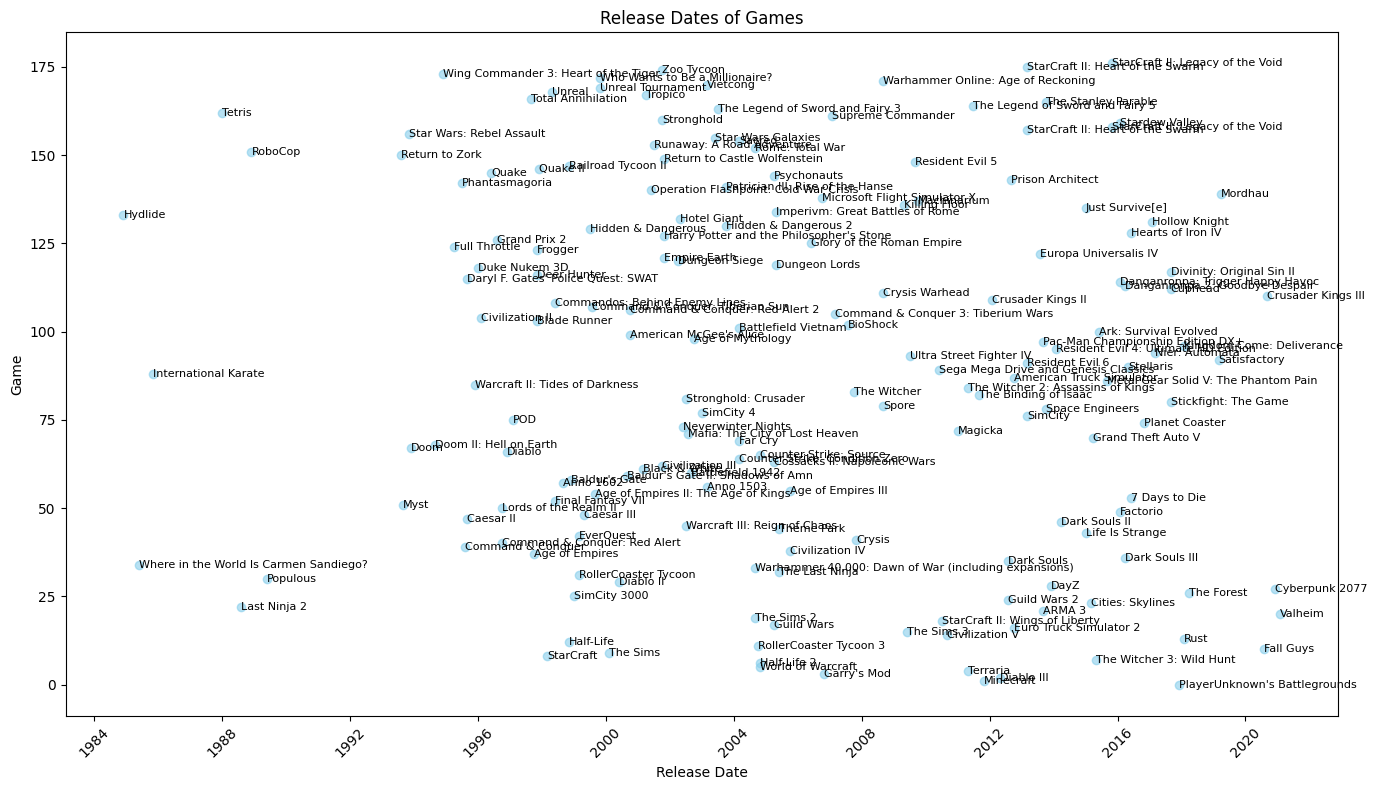

In [43]:
# Creating visualization
plt.figure(figsize=(14, 8))
plt.scatter(df['Release'], df.index, color='skyblue', alpha=0.6)

for i in range(len(df)):
    plt.annotate(df['Name'][i], (df['Release'][i], df.index[i]), fontsize=8, ha='left', va='center')

plt.title('Release Dates of Games')
plt.xlabel('Release Date')
plt.ylabel('Game')
plt.xticks(rotation=45)
plt.tight_layout()

# Diplaying the plot
plt.show()

## **Which publisher published most of the games?**

In [17]:
# Publisher published most of the games
most_games_publisher = df['Publisher'].value_counts().idxmax()
print("\nPublisher with Most Games:", most_games_publisher)


Publisher with Most Games: Electronic Arts


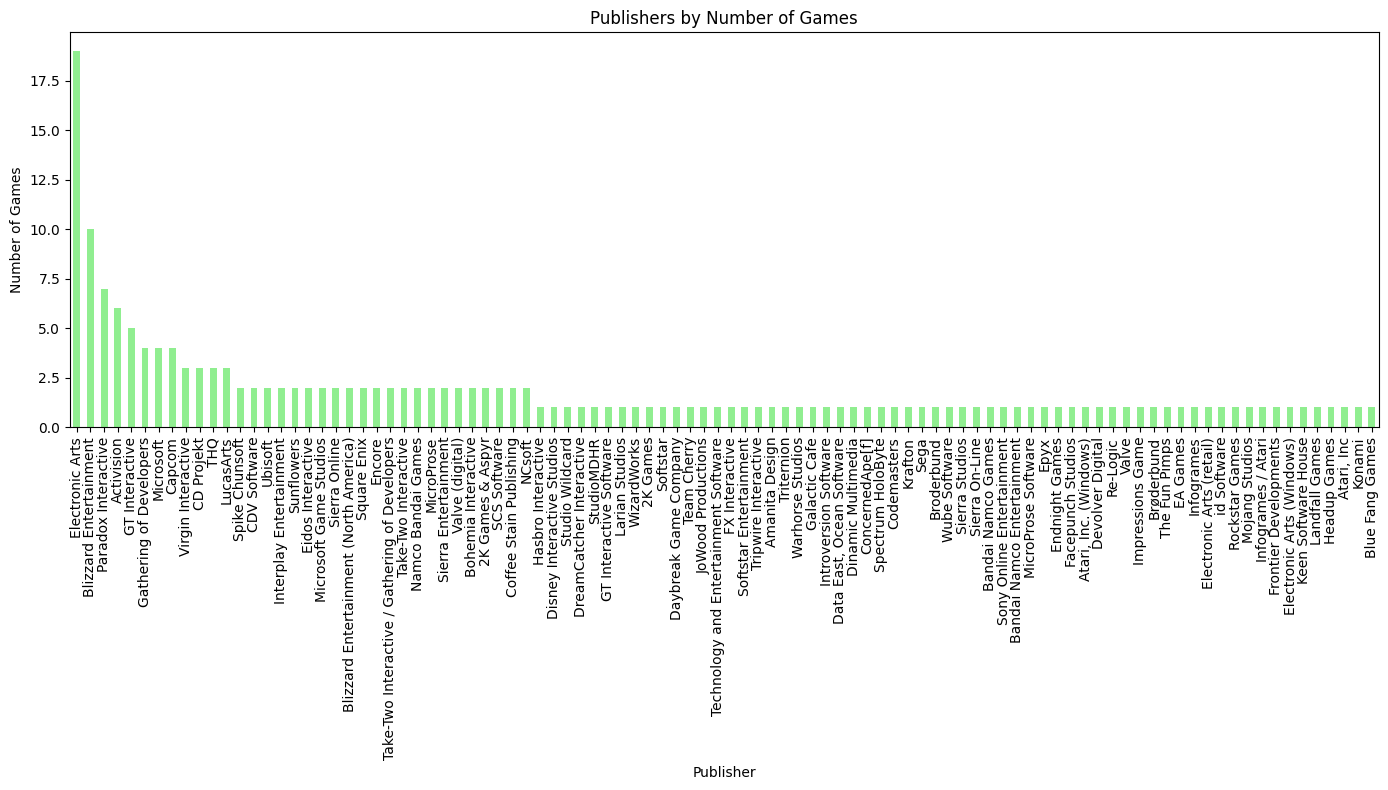

In [19]:
# Creating visualization with bar chart
publisher_counts = df['Publisher'].value_counts()
plt.figure(figsize=(14, 8))
publisher_counts.plot(kind='bar', color='lightgreen')
plt.title('Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()

### **Which developer developed most of the games?**

In [20]:
# Developer developed most of the games
most_games_developer = df['Developer'].value_counts().idxmax()
print("Developer with Most Games:", most_games_developer)

Developer with Most Games: Blizzard Entertainment


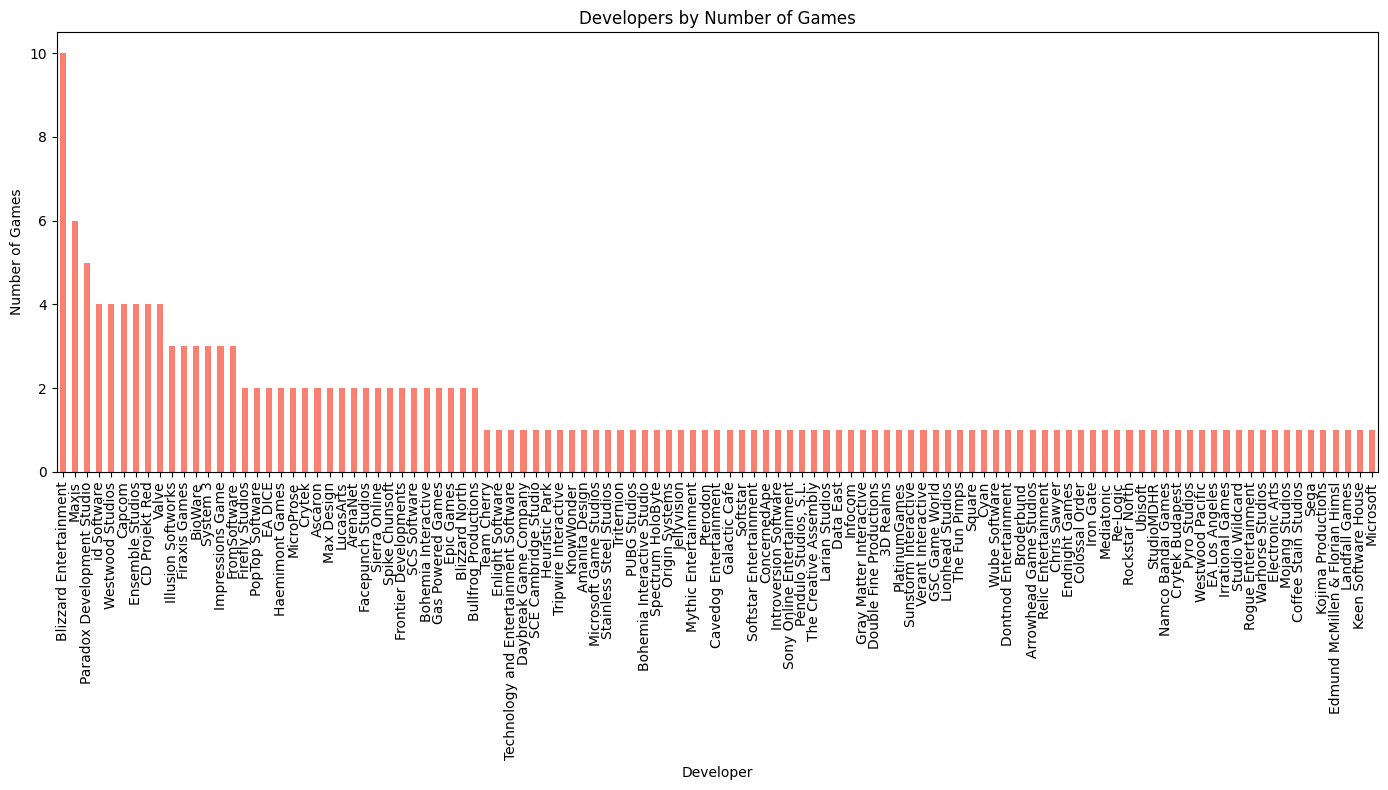

In [24]:
# Creating visualization with bar chart

developer_counts = df['Developer'].value_counts()
plt.figure(figsize=(14, 8))
developer_counts.plot(kind='bar', color='salmon')
plt.title('Developers by Number of Games')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()

### **Which series has the most sales?**

In [44]:
# Group by series and sum the sales
series_sales = df.groupby('Series')['Sales'].sum()

# Find the series with the most sales
most_sales_series = series_sales.idxmax()
total_sales = series_sales.max()

print("Series with the Most Sales:", most_sales_series)
print("Total Sales:", total_sales)

Series with the Most Sales: Minecraft
Total Sales: 33.0


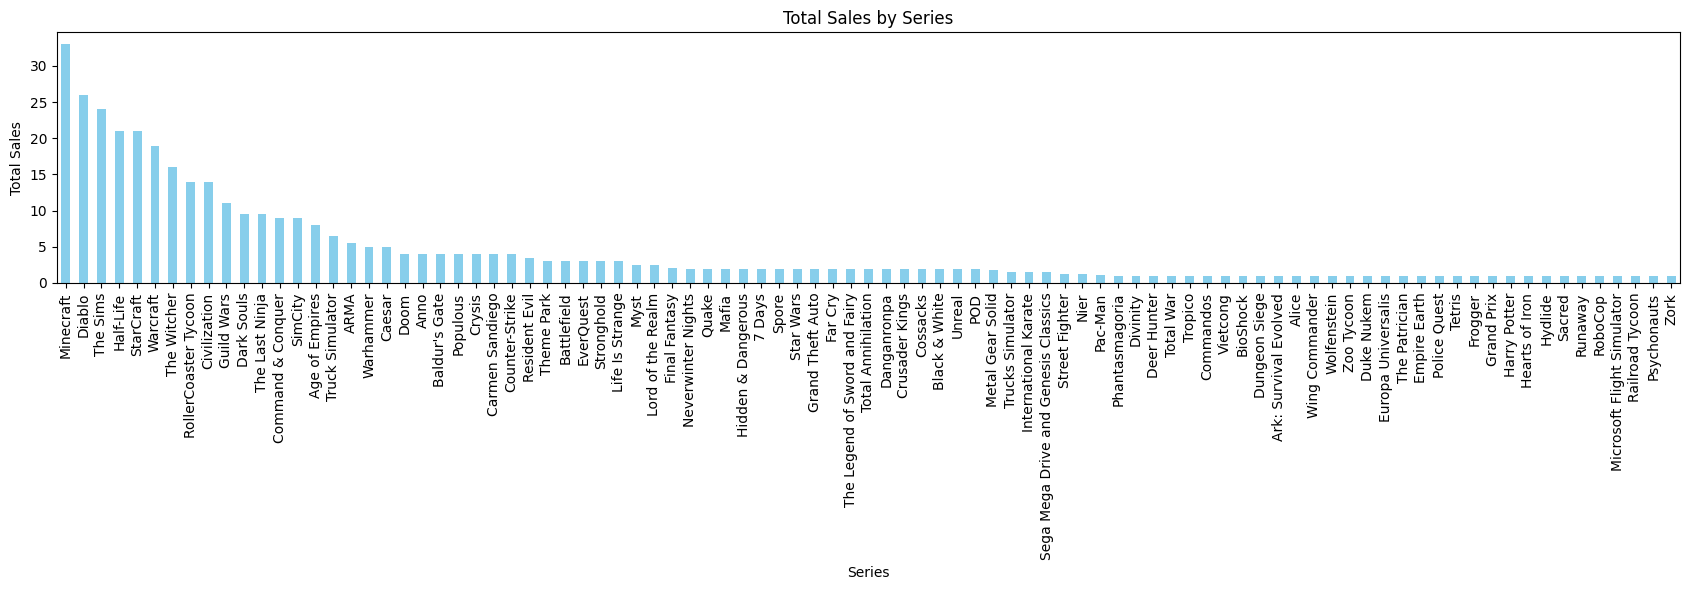

In [45]:
# Sorting series sales data
series_sales_sorted = series_sales.sort_values(ascending=False)

# Creating visualization with bar chart
plt.figure(figsize=(17, 6))
bar_plot = series_sales_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Series')
plt.ylabel('Total Sales')
plt.title('Total Sales by Series')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()

### **Which series have the most games?**


In [46]:
# Count the occurrences of each series
series_counts = df['Series'].value_counts()

# Find the series with the most games
most_games_series = series_counts.idxmax()
num_games = series_counts.max()

print("Series with the most games:", most_games_series)
print("Number of games in the series:", num_games)

Series with the most games: StarCraft
Number of games in the series: 6


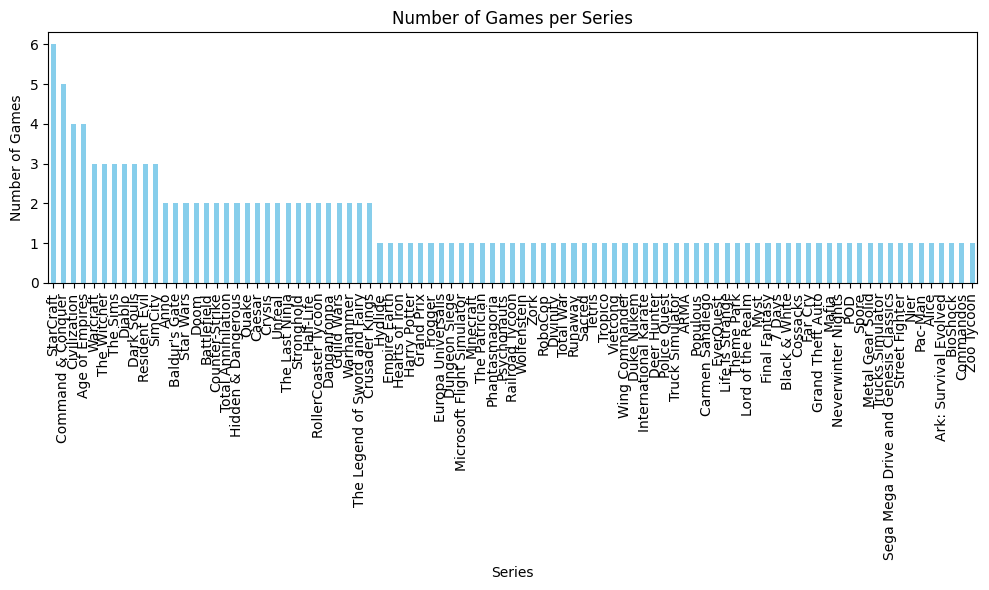

In [47]:
# Count the occurrences of each series
series_counts = df['Series'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
series_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Series')
plt.xlabel('Series')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()